In [ ]:
import pandas as pd

dataMAS = pd.read_excel('/content/Movimiento Armonico Simple.xlsx')
#data = data.loc[:,'t(s)': 'x(cm)']

df = dataMAS[['t (s)', 'x (cm)']]
# Eliminar filas sin datos numéricos en 't(s)' y 'x(cm)'
df = df[pd.to_numeric(df['t (s)'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['x (cm)'], errors='coerce').notnull()]

# Convertir las columnas a tipo numérico
df['t (s)'] = pd.to_numeric(df['t (s)'])
df['x (cm)'] = pd.to_numeric(df['x (cm)'])

# Mostrar el dataframe resultante
df

,t (s),x (cm)
0,0.00000,1.81859
1,0.01745,1.75612
2,0.03491,1.68505
3,0.05236,1.60581
4,0.06981,1.51875
...,...,...
1495,26.09915,-0.81104
1496,26.11661,-0.68149
1497,26.13407,-0.54862
1498,26.15153,-0.41307


Parámetros ajustados: [2.00000000e+00 3.99999997e+00 2.00000041e+00 2.49984039e-08]
Coeficiente de determinación R^2: 0.9999999999957536


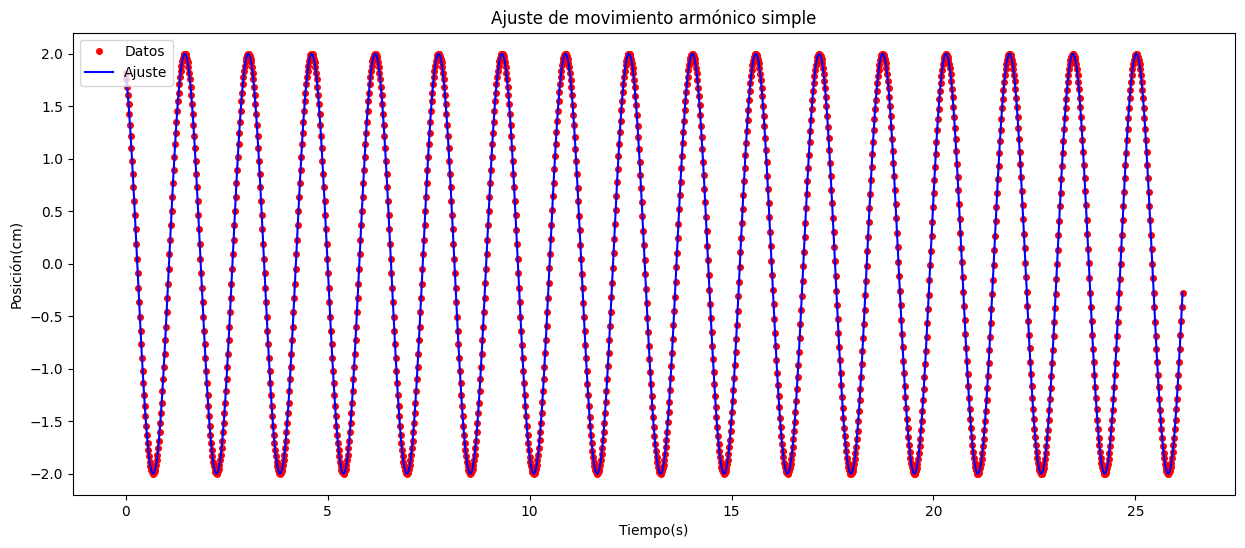

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, basinhopping

# Función del movimiento armónico simple
def movimiento_armonico(t, A, f, phi, C):
    return A * np.sin(f * t + phi) + C

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
t = df['t (s)']  # Tiempo
y = df['x (cm)']  # Posición

# Definir límites o rangos para cada parámetro
bounds = [(0, 5), (0, 10), (0, 8), (-1, 1)]

# Función objetivo para el ajuste
def objetivo(params):
    return np.sum((y - movimiento_armonico(t, *params))**2)

# Ejecutar la optimización con basinhopping
result = basinhopping(objetivo, x0=[1, 1, 0, 0], minimizer_kwargs={"bounds": bounds})

# Obtener los parámetros ajustados
params = result.x

# Valores ajustados
y_fit = movimiento_armonico(t, *params)

# Coeficiente de determinación R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r2 = 1 - (ss_residual / ss_total)

# Imprimir los parámetros y el valor de R^2
print("Parámetros ajustados:", params)
print("Coeficiente de determinación R^2:", r2)

# Gráfico
plt.figure(figsize=(15, 6))
plt.plot(t, y, 'ro', label='Datos', markersize=4)  # Puntos
plt.plot(t, y_fit, 'b-', label='Ajuste')  # Función ajustada
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición(cm)')
plt.title('Ajuste de movimiento armónico simple')
plt.legend()
plt.show()


In [ ]:

dataMASA = pd.read_excel('/content/Movimiento Amortiguado.xlsx', header=None)
#data = data.loc[:,'t(s)': 'x(cm)']

df = dataMASA.iloc[:,:2]

df

,0,1
0,0.00,3.062870e-18
1,0.01,-6.830000e-03
2,0.02,-1.234000e-02
3,0.03,-1.660000e-02
4,0.04,-1.970000e-02
...,...,...
1495,14.95,1.712220e-60
1496,14.96,1.639020e-60
1497,14.97,1.532100e-60
1498,14.98,1.400000e-60


Parámetros ajustados: [ 4.99915049e-02 -8.99817224e+00  1.50000000e+01 -3.14160284e+00
 -2.85014604e-08]
Coeficiente de determinación R^2: 0.9999999418018191


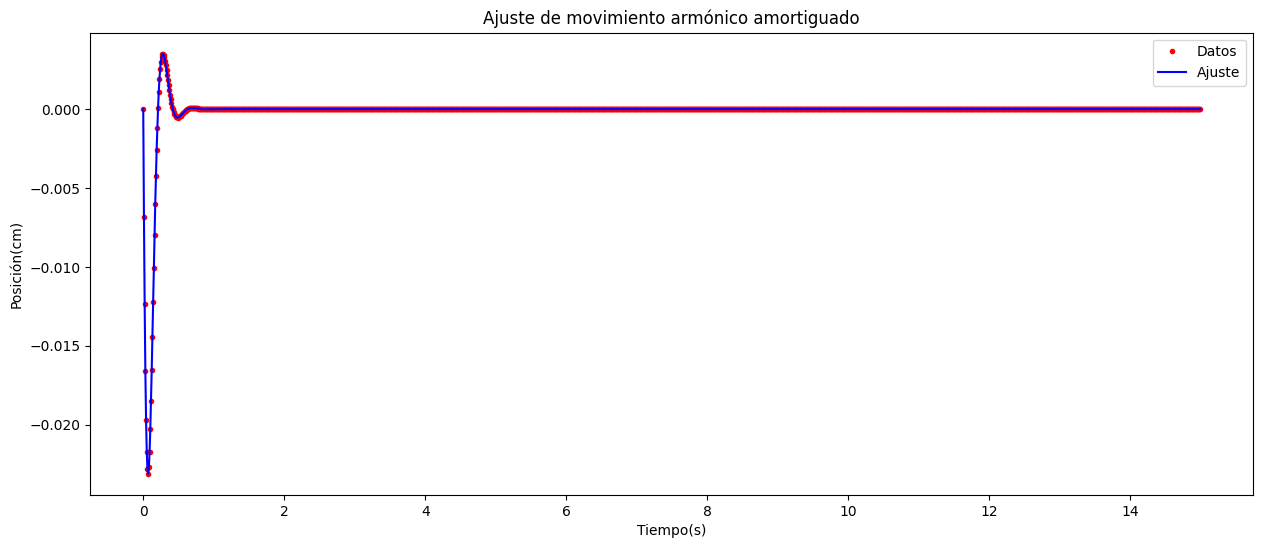

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, basinhopping

# Función del movimiento armónico amortiguado
def movimiento_armonico_amortiguado(t, A, gamma, f, phi, C):
    return A * np.exp(t * gamma) * np.sin(f * t + phi) + C

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
t = df.iloc[:, 0]  # Tiempo
y = df.iloc[:, 1]  # Posición

# Definir límites o rangos para cada parámetro
bounds = [(-1, 1), (-20, 20), (-15, 15), (-5, 5), (-1, 1)]

# Función objetivo para el ajuste
def objetivo(params):
    return np.sum((y - movimiento_armonico_amortiguado(t, *params))**2)

# Ejecutar la optimización con basinhopping
result = basinhopping(objetivo, x0=[1, -0.1, 1, 0, 0], minimizer_kwargs={"bounds": bounds})

# Obtener los parámetros ajustados
params = result.x

# Valores ajustados
y_fit = movimiento_armonico_amortiguado(t, *params)

# Coeficiente de determinación R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r2 = 1 - (ss_residual / ss_total)

# Imprimir los parámetros y el valor de R^2
print("Parámetros ajustados:", params)
print("Coeficiente de determinación R^2:", r2)

# Gráfico
plt.figure(figsize=(15, 6))
plt.plot(t, y, 'ro', label='Datos', markersize=3)  # Puntos
plt.plot(t, y_fit, 'b-', label='Ajuste')  # Función ajustada
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición(cm)')
plt.title('Ajuste de movimiento armónico amortiguado')
plt.legend()
plt.show()


In [ ]:
dataCondensador = pd.read_excel('/content/carga de un condensador.xlsx', header=None)
#data = data.loc[:,'t(s)': 'x(cm)']

df = dataCondensador.iloc[:,:2]

df

,0,1
0,0.00,0.0000
1,0.01,1.3245
2,0.02,2.6314
3,0.03,3.9211
4,0.04,5.1936
...,...,...
595,5.95,99.9641
596,5.96,99.9646
597,5.97,99.9651
598,5.98,99.9655


Parámetros ajustados: [-1.0492223  -1.33333323  4.55712088 99.99999993]
Coeficiente de determinación R^2: 0.9999999999982664


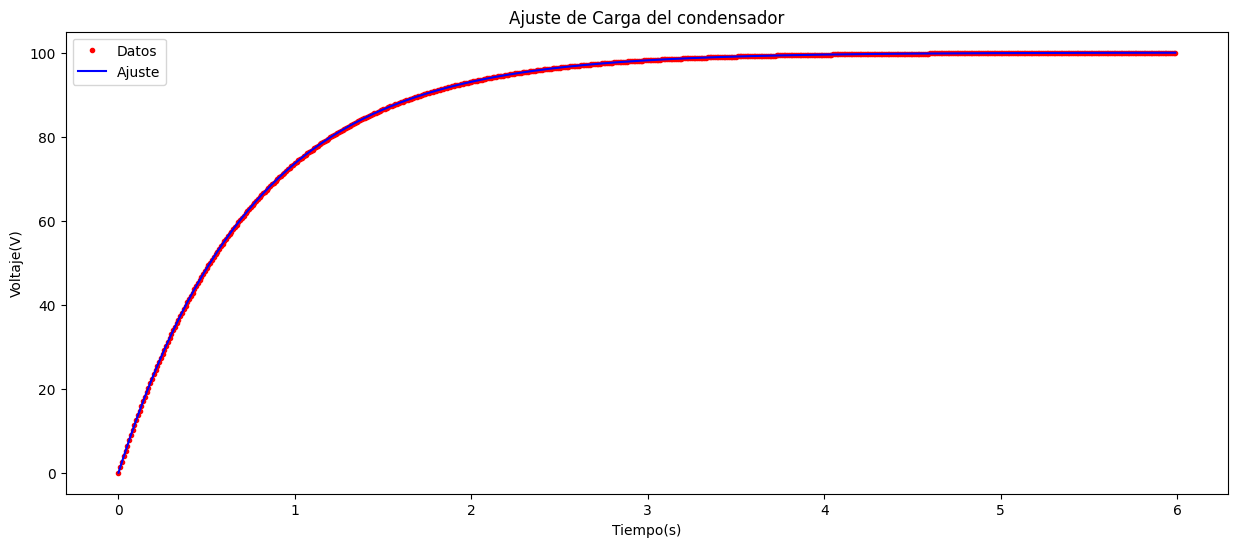

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, basinhopping

# Función de carga del condensador
def carga_condensador(t, A, B, C, D):
    return A * np.exp(B * t + C) + D

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
t = df.iloc[:, 0]  # Tiempo
y = df.iloc[:, 1]  # Posición

# Definir límites o rangos para cada parámetro
bounds = [(-100, 100), (-2, 2), (-10, 10), (0, 100)]

# Función objetivo para el ajuste
def objetivo(params):
    return np.sum((y - carga_condensador(t, *params))**2)

# Ejecutar la optimización con basinhopping
result = basinhopping(objetivo, x0=[-1, 0, -1, 100], minimizer_kwargs={"bounds": bounds})

# Obtener los parámetros ajustados
params = result.x

# Valores ajustados
y_fit = carga_condensador(t, *params)

# Coeficiente de determinación R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r2 = 1 - (ss_residual / ss_total)

# Imprimir los parámetros y el valor de R^2
print("Parámetros ajustados:", params)
print("Coeficiente de determinación R^2:", r2)

# Gráfico
plt.figure(figsize=(15, 6))
plt.plot(t, y, 'ro', label='Datos', markersize=3)  # Puntos
plt.plot(t, y_fit, 'b-', label='Ajuste')  # Función ajustada
plt.xlabel('Tiempo(s)')
plt.ylabel('Voltaje(V)')
plt.title('Ajuste de Carga del condensador')
plt.legend()
plt.show()


In [ ]:
-1.0492223*np.exp(4.55712088)

-99.99999170856069

In [ ]:
dataDesintegracionNuclear = pd.read_excel('/content/Desintegración Nuclear 2.xlsx', header=None)
#data = data.loc[:,'t(s)': 'x(cm)']

df = dataDesintegracionNuclear.iloc[:,:2]

df

,0,1
0,0.0,1000
1,19.7,904
2,41.0,812
3,59.3,740
4,79.8,665
5,102.6,588
6,120.9,532
7,141.0,470
8,162.5,421
9,201.4,343


Parámetros ajustados: [ 1.00000000e+01 -5.28550189e-03  4.59706026e+00  1.00000000e+01]
Coeficiente de determinación R^2: 0.9994740487612961


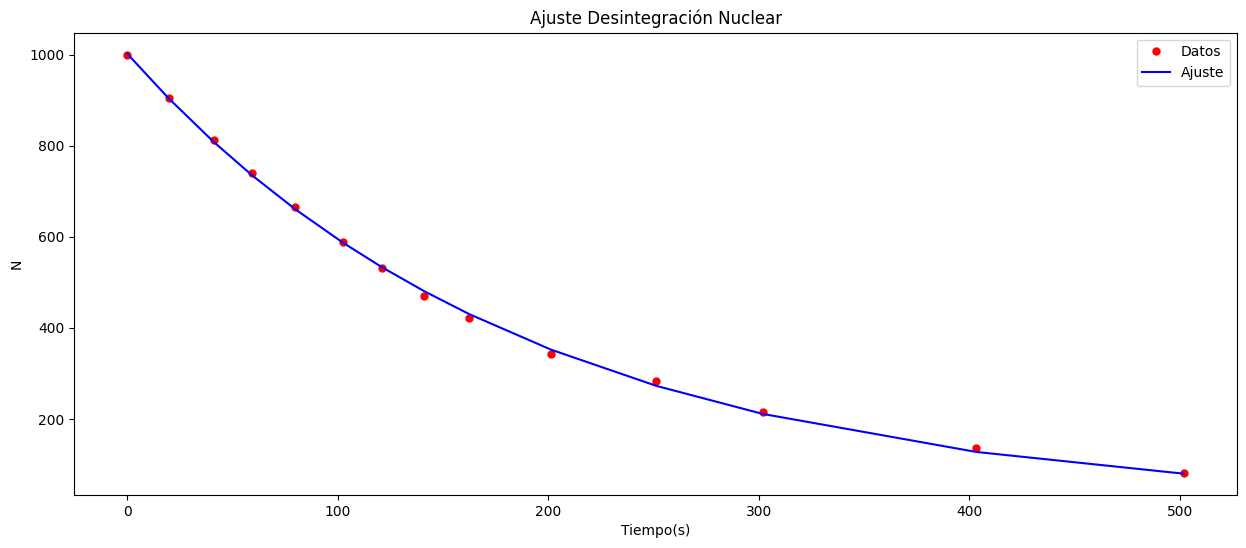

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, basinhopping

# Función de desintegración nuclear
def DesintegracionNuclear(t, A, B, C, D):
    return A * np.exp(B * t + C) + D

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
t = df.iloc[:, 0]  # Tiempo
y = df.iloc[:, 1]  # Posición

# Definir límites o rangos para cada parámetro
bounds = [(0, 10), (-1, 1), (-10, 10), (-10, 10)]

# Función objetivo para el ajuste
def objetivo(params):
    return np.sum((y - DesintegracionNuclear(t, *params))**2)

# Ejecutar la optimización con basinhopping
result = basinhopping(objetivo, x0=[1, 0, 0, 0], minimizer_kwargs={"bounds": bounds})

# Obtener los parámetros ajustados
params = result.x

# Valores ajustados
y_fit = DesintegracionNuclear(t, *params)

# Coeficiente de determinación R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r2 = 1 - (ss_residual / ss_total)

# Imprimir los parámetros y el valor de R^2
print("Parámetros ajustados:", params)
print("Coeficiente de determinación R^2:", r2)

# Gráfico
plt.figure(figsize=(15, 6))
plt.plot(t, y, 'ro', label='Datos', markersize=5)  # Puntos
plt.plot(t, y_fit, 'b-', label='Ajuste')  # Función ajustada
plt.xlabel('Tiempo(s)')
plt.ylabel('N')
plt.title('Ajuste Desintegración Nuclear')
plt.legend()
plt.show()
